In [185]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
from sklearn.compose import ColumnTransformer
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve,precision_score,recall_score,f1_score,confusion_matrix,accuracy_score
from sklearn.feature_selection import RFE

In [66]:
raw_data=pd.read_csv("medical_students_dataset.csv")
raw_data.sort_values("Student ID",inplace=True)
raw_data=raw_data.applymap(lambda x: np.nan if x is None else x)
raw_data.head(10)

C:\Users\ahmad\AppData\Local\Temp\ipykernel_11724\62467871.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  raw_data=raw_data.applymap(lambda x: np.nan if x is None else x)


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
100001,2.0,34.0,Male,152.069157,47.630941,B,20.597139,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
100003,4.0,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
100004,5.0,23.0,Female,179.339293,46.234173,O,14.375143,98.480008,95.0,139.0,231.0,No,No
5,6.0,32.0,NaN,151.491294,68.647805,B,29.912403,99.668373,70.0,128.0,183.0,NaN,Yes
100005,6.0,32.0,Female,NaN,NaN,B,29.912403,99.668373,70.0,128.0,183.0,No,Yes
6,7.0,21.0,NaN,172.949704,48.102744,AB,16.081635,97.715469,66.0,134.0,247.0,No,No


as you can see data includes null values and dublicates.


In [67]:
raw_data.describe()

,Student ID,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,49974.042078,26.021561,174.947103,69.971585,23.338869,98.600948,79.503767,114.558033,184.486361
std,28879.641657,4.890528,14.447560,17.322574,7.033554,0.500530,11.540755,14.403353,37.559678
min,1.000000,18.000000,150.000041,40.000578,10.074837,96.397835,60.000000,90.000000,120.000000
25%,24971.750000,22.000000,162.476110,54.969838,17.858396,98.264750,70.000000,102.000000,152.000000
50%,49943.500000,26.000000,174.899914,69.979384,22.671401,98.599654,80.000000,115.000000,184.000000
75%,74986.000000,30.000000,187.464417,84.980097,27.997487,98.940543,90.000000,127.000000,217.000000
max,100000.000000,34.000000,199.998639,99.999907,44.355113,100.824857,99.000000,139.000000,249.000000


In [68]:
raw_data.sort_values("Student ID")

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
100001,2.0,34.0,Male,152.069157,47.630941,B,20.597139,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
100003,4.0,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199917,NaN,30.0,Male,160.993293,48.725905,B,18.799416,98.220218,NaN,91.0,139.0,No,No
199940,NaN,30.0,NaN,158.451908,75.739627,AB,30.166729,98.089516,73.0,108.0,143.0,No,No
199941,NaN,NaN,NaN,167.192837,50.169768,NaN,17.947616,97.584901,81.0,107.0,244.0,No,Yes
199956,NaN,21.0,Female,NaN,91.240475,B,30.272756,NaN,71.0,98.0,176.0,No,Yes


we should be sure that data inclueds dublicates

In [69]:
raw_data.drop_duplicates(inplace=True)
raw_data[raw_data["Student ID"]==8]

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
7,8.0,28.0,Male,186.489402,52.389752,AB,15.063921,98.227788,85.0,123.0,128.0,No,No


we removed doblicate and test to be sure we remove right values and keep one of the dublicate data

In [70]:
def check_nulls():
    nul_vals=pd.DataFrame(pd.isnull(raw_data).sum(axis=0),columns=["total nulvalues"])
    nul_vals["percent"]=pd.isnull(raw_data).sum(axis=0)/len(raw_data)
    print(nul_vals)
check_nulls()

                total nulvalues   percent
Student ID                19891  0.103407
Age                       19892  0.103412
Gender                    19924  0.103579
Height                    19907  0.103490
Weight                    19901  0.103459
Blood Type                19916  0.103537
BMI                       19900  0.103454
Temperature               19911  0.103511
Heart Rate                19903  0.103470
Blood Pressure            19892  0.103412
Cholesterol               19893  0.103418
Diabetes                  19905  0.103480
Smoking                   19897  0.103438


as you can see, in each raw we have around 10 percent of data is null, so we cannot remove them. instead, first we shouyld try to recalculate null values in BMI.

In [71]:
import math
def BMI_fixer(row):
    if pd.isna(row["BMI"]):
        if ~pd.isna(row["Height"]):
            if ~pd.isna(row["Weight"]):
                row["BMI"]=row["Weight"]/(row["Height"]**2)

    if pd.isna(row["Height"]):
        if ~pd.isna(row["BMI"]):
            if ~pd.isna(row["Weight"]):
                row["Height"]= math.sqrt(row["Weight"]/row["BMI"])

    if pd.isna(row["Weight"]):
        if ~pd.isna(row["BMI"]):
            if ~pd.isna(row["Height"]):
                row["Weight"]=(row["Height"]**2)* row["BMI"] 
    return row
raw_data["Height"]=round(raw_data["Height"]/100,2)
raw_data = raw_data.where(pd.notna(raw_data), None)
raw_data=raw_data.apply(lambda x: BMI_fixer(x),axis=1)  

we can calculate BMI based on weight and height, so if one of the columns is null we can calculate that with other columns

In [72]:
check_nulls()

                total nulvalues   percent
Student ID                19891  0.103407
Age                       19892  0.103412
Gender                    19924  0.103579
Height                     3761  0.019552
Weight                     3771  0.019604
Blood Type                19916  0.103537
BMI                        3771  0.019604
Temperature               19911  0.103511
Heart Rate                19903  0.103470
Blood Pressure            19892  0.103412
Cholesterol               19893  0.103418
Diabetes                  19905  0.103480
Smoking                   19897  0.103438


now we can remove remaining null valus in BMI because the number of nulls is less than 5 %, Also remove height and weight, because we can use BNI instead of them

In [73]:
raw_data.dropna(subset=['BMI'],inplace=True)
raw_data.drop(["Height","Weight","Student ID"],axis=1,inplace=True)

Removing useless columns

In [74]:
rows=pd.DataFrame()
for column in raw_data.columns[raw_data.dtypes=="float64"]:
    q75=raw_data[column].quantile(0.75)
    q25=raw_data[column].quantile(0.25)
    iqr=q75-q25
    upper=q75+(1.5*iqr)
    lower=q25-(1.5*iqr)
    rows=pd.concat([rows,raw_data[(raw_data[column]>upper)|(raw_data[column]<lower)]])
raw_data.drop(rows.index,inplace=True)

manage outliers that may have neetive impact in our data

(array([6.8710e+04, 7.4552e+04, 3.3499e+04, 0.0000e+00, 8.7500e+03,
        1.4770e+03, 0.0000e+00, 1.5400e+02, 1.2000e+01, 1.0000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

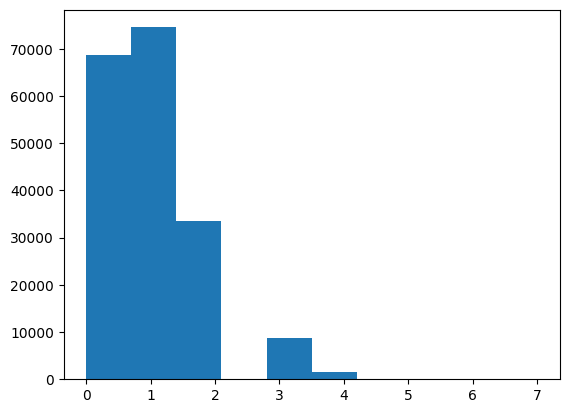

In [75]:
plt.hist(raw_data.isnull().sum(axis=1))

(array([68710.,     0.,     0., 74552.,     0.,     0., 33499.,     0.,
            0.,  8750.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

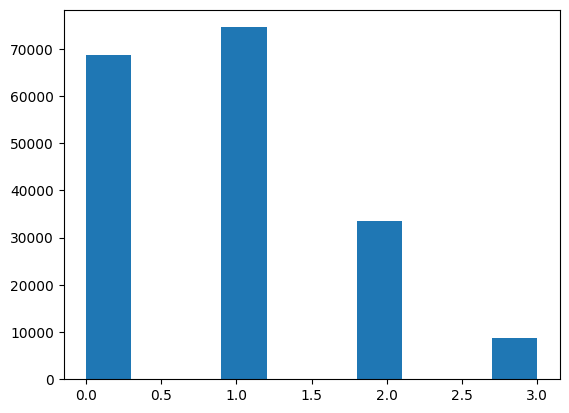

In [76]:
raw_data.drop(raw_data[raw_data.isnull().sum(axis=1)>3].index,inplace=True)
plt.hist(pd.isnull(raw_data).sum(axis=1))

(array([19225., 19654.,  9922., 19411.,  9926., 19694., 19990.,  9711.,
        19518., 19857.]),
 array([18. , 19.6, 21.2, 22.8, 24.4, 26. , 27.6, 29.2, 30.8, 32.4, 34. ]),
 <BarContainer object of 10 artists>)

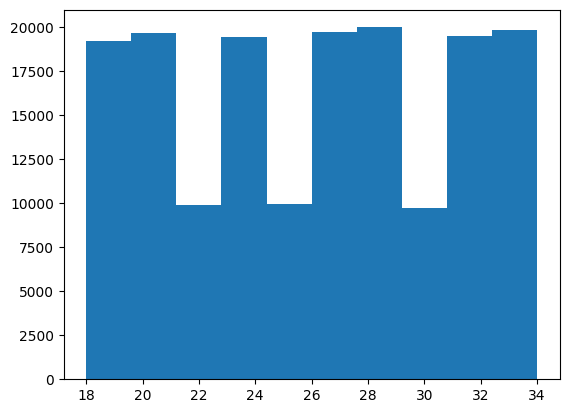

In [77]:
plt.hist(raw_data["Age"])

removing columns with more than three null values for each rows

In [78]:

y_data=raw_data[["Diabetes"]]
x_data=raw_data.drop(["Diabetes"],axis=1)

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,train_size=0.8,random_state=42)



In [79]:
numXT_imputer=SimpleImputer(strategy="mean")
numXTr_data=pd.DataFrame(numXT_imputer.fit_transform(x_train[["Age","Temperature","Heart Rate","Cholesterol","BMI","Blood Pressure"]]),columns=["Age","Temperature","Heart Rate","Cholesterol","BMI","Blood Pressure"])
numXTst_data=pd.DataFrame(numXT_imputer.transform(x_test[["Age","Temperature","Heart Rate","Cholesterol","BMI","Blood Pressure"]]),columns=["Age","Temperature","Heart Rate","Cholesterol","BMI","Blood Pressure"])

def numeric_to_cat(df,columns,nbins):
    mins=[]
    maxs=[]
    for column in columns:
        mins.append(df[column].min())
        maxs.append(df[column].max())
        bins = np.linspace(mins[-1], maxs[-1], nbins).tolist()
        label=[f"{round(bins[i],2)}-{round(bins[i+1],2)}" for i in range(len(bins)-1) ]        
        df[column]=pd.cut(df[column],bins=bins,labels=label)
        df=pd.concat([df.drop(columns=column),pd.get_dummies(df[column],prefix=column).replace({True:1,False:0})],axis=1)
    return df,mins,maxs
        
numXTr_data,min,max=numeric_to_cat(numXTr_data,["Age","Temperature","Heart Rate","Cholesterol","BMI","Blood Pressure"],10)

def numeric_to_cat(df,columns,nbins,min,max):
    for ind,column in enumerate(columns) :
        bins = np.linspace(min[ind], max[ind], nbins).tolist()
        label=[f"{round(bins[i],2)}-{round(bins[i+1],2)}" for i in range(len(bins)-1) ]        
        df[column]=pd.cut(df[column],bins=bins,labels=label)
        df=pd.concat([df.drop(columns=column),pd.get_dummies(df[column],prefix=column).replace({True:1,False:0})],axis=1)
    return df

numXTst_data=numeric_to_cat(numXTst_data,["Age","Temperature","Heart Rate","Cholesterol","BMI","Blood Pressure"],10,min,max)     

In [80]:
cat_imputer=SimpleImputer(strategy="most_frequent")
x_train[["Gender", "Blood Type", "Smoking"]] = x_train[["Gender", "Blood Type", "Smoking"]].applymap(lambda x: np.nan if x is None else x)
catXTr_data=cat_imputer.fit_transform(x_train[["Gender","Blood Type","Smoking"]])
catXTr_data=pd.DataFrame(catXTr_data,columns=["Gender","Blood Type","Smoking"])
catXTr_data["Gender"]=catXTr_data["Gender"].replace({"Male":1,"Female":0})
catXTr_data["Smoking"]=catXTr_data["Smoking"].replace({"Yes":1,"No":0})  
catXTr_data=pd.concat([catXTr_data,pd.get_dummies(catXTr_data["Blood Type"],prefix="Blood Type: ").replace({True:1,False:0})],axis=1).drop(["Blood Type"],axis=1)  


C:\Users\ahmad\AppData\Local\Temp\ipykernel_11724\656077218.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x_train[["Gender", "Blood Type", "Smoking"]] = x_train[["Gender", "Blood Type", "Smoking"]].applymap(lambda x: np.nan if x is None else x)


In [81]:
x_test[["Gender", "Blood Type", "Smoking"]] = x_test[["Gender", "Blood Type", "Smoking"]].applymap(lambda x: np.nan if x is None else x)
catXTst_data=cat_imputer.transform(x_test[["Gender","Blood Type","Smoking"]])
catXTst_data=pd.DataFrame(catXTst_data,columns=["Gender", "Blood Type", "Smoking"])
catXTst_data["Gender"]=catXTst_data["Gender"].replace({"Male":1,"Female":0})
catXTst_data["Smoking"]=catXTst_data["Smoking"].replace({"Yes":1,"No":0})  
catXTst_data=pd.concat([catXTst_data,pd.get_dummies(catXTst_data["Blood Type"],prefix="Blood Type: ").replace({True:1,False:0})],axis=1).drop(["Blood Type"],axis=1) 




C:\Users\ahmad\AppData\Local\Temp\ipykernel_11724\1390917312.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x_test[["Gender", "Blood Type", "Smoking"]] = x_test[["Gender", "Blood Type", "Smoking"]].applymap(lambda x: np.nan if x is None else x)


In [82]:
numYT_imputer=SimpleImputer(strategy="most_frequent")
y_train[["Diabetes"]]=y_train[["Diabetes"]].applymap(lambda x: np.nan if x is None else x)
numYTr_data=numYT_imputer.fit_transform(y_train[["Diabetes"]])
numYTr_data=pd.DataFrame(numYTr_data,columns=["Diabetes"])

y_test[["Diabetes"]]=y_test[["Diabetes"]].applymap(lambda x: np.nan if x is None else x)
numYTst_data=numYT_imputer.transform(y_test[["Diabetes"]])
numYTst_data=pd.DataFrame(numYTst_data,columns=["Diabetes"])


nx_train=pd.concat([numXTr_data,catXTr_data], axis=1)
nx_test=pd.concat([numXTst_data,catXTst_data], axis=1)


C:\Users\ahmad\AppData\Local\Temp\ipykernel_11724\14132349.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_train[["Diabetes"]]=y_train[["Diabetes"]].applymap(lambda x: np.nan if x is None else x)
C:\Users\ahmad\AppData\Local\Temp\ipykernel_11724\14132349.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_test[["Diabetes"]]=y_test[["Diabetes"]].applymap(lambda x: np.nan if x is None else x)


In [94]:
numYTst_data

,Diabetes
0,Yes
1,Yes
2,No
3,No
4,No
...,...
37098,No
37099,Yes
37100,No
37101,No


In [180]:
lr=LogisticRegression(class_weight="balanced",max_iter=1000, verbose=1)
lr.fit(nx_train,numYTr_data)
y_pred=lr.predict(nx_test)


C:\Users\ahmad\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [156]:

print(confusion_matrix(numYTst_data,y_pred))


[[17639 16127]
 [ 1714  1623]]


In [ ]:
print(precision_score(np.where(np.array(numYTst_data)[:,0]=="Yes",1,0),np.where(y_pred=="Yes",1,0)))
print(recall_score(np.where(np.array(numYTst_data)[:,0]=="Yes",1,0),np.where(y_pred=="Yes",1,0)))
print(f1_score(np.where(np.array(numYTst_data)[:,0]=="Yes",1,0),np.where(y_pred=="Yes",1,0)))
print(accuracy_score(np.where(np.array(numYTst_data)[:,0]=="Yes",1,0),np.where(y_pred=="Yes",1,0)))

0.09143661971830985
0.48636499850164816
0.15393370322947786
0.5191493949276339


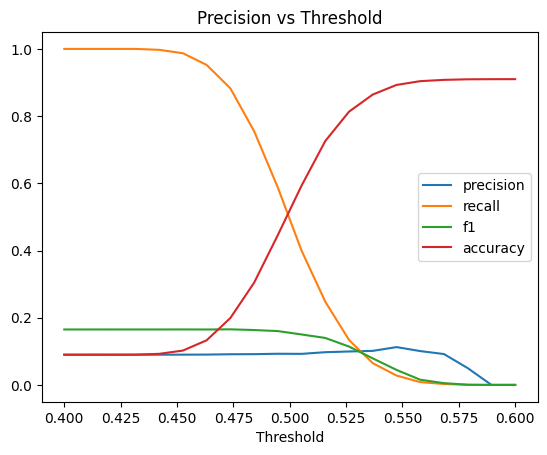

In [193]:
precision=[]
recall=[]
f1=[]
accuracy=[]
for i in np.linspace(0.40,0.60,20):
    pred=lr.predict_proba(nx_test)[:,1]
    nypred=np.where(pred >= i, 1, 0)
    precision.append(precision_score(np.where(np.array(numYTst_data)[:,0]=="Yes",1,0),nypred))   
    recall.append(recall_score(np.where(np.array(numYTst_data)[:,0]=="Yes",1,0),nypred))
    f1.append(f1_score(np.where(np.array(numYTst_data)[:,0]=="Yes",1,0),nypred))
    accuracy.append(accuracy_score(np.where(np.array(numYTst_data)[:,0]=="Yes",1,0),nypred))

sns.lineplot(x=np.linspace(0.40,0.60,20),y=precision,label="precision")
sns.lineplot(x=np.linspace(0.40,0.60,20),y=recall,label="recall")
sns.lineplot(x=np.linspace(0.40,0.60,20),y=f1,label="f1")
sns.lineplot(x=np.linspace(0.40,0.60,20),y=accuracy,label="accuracy")
plt.xlabel("Threshold")
plt.title("Precision vs Threshold")
plt.legend()
plt.show()

In [198]:
print(confusion_matrix(np.where(np.array(numYTst_data)[:,0]=="Yes",1,0),nypred))

[[33765     1]
 [ 3337     0]]
